# Classification of MRI brain images into healthy or pathological


This is a machine learning task that classifies MRI Scan images as healthy or pathological.

### DATA
The data for this project was obtained from this repository: https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection

### FILE STRUCTURE.
Create a folder named 'data' in the same directory as this file (the code file) \
Inside the 'data' folder, create another folder named 'brain_mri_dataset' \
Place in this folder the 'no' and 'yes' data folders retrieved from the data site.

### Import modules and libraries

In [1]:
#Import the necessary libraries first

import tensorflow as tf
import os
import itertools
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import backend as K
from sklearn.metrics import confusion_matrix
import shutil
import glob
import re
import cv2
import math

In [2]:
#  ASSIGN VARIABLES TO THE PATHS OF THE DATA FILES
data = './data/brain_mri_dataset'
No_brain_tumor = './data/brain_mri_dataset/no/'
Yes_brain_tumor = './data/brain_mri_dataset/yes/'

## Assign Classes/Labels To Each Image In The Data Directory

In [3]:
# CREATE A FUNCTION FOR PUTTING TOGETHER ALL THE IMAGE FILES IN THE DATASET AND ASSIGN THEM LABELS

def filepaths_with_labels(No_brain_tumor_path, Yes_brain_tumor_path):
    # List of the paths to the two directories in the brain_tumor_dataset folder
    dirlist=[No_brain_tumor_path, Yes_brain_tumor_path]
    # ['brain_tumor_dataset/no/', 'brain_tumor_dataset/yes/']

    # Classes to be assigned to each of the path
    classes=['No', 'Yes']

    # A list to hold the filepath for each image in the dataset
    filepaths=[]

    # A list to hold the labels of each file in the brain_tumor_dataset path
    labels=[]
    for i,j in zip(dirlist, classes):
        ## print(i)
        # ./data/brain-tumor-dataset/no/        # ./data/brain-tumor-dataset/yes/
        ## print(j)
        # No          # Yes

        # A list of all images in both the 'No' class and the 'Yes' class
        filelist = os.listdir(i)

        # Code to place the path of each file in the filelist into the filepath list.
        for f in filelist:
            filepath=os.path.join (i,f)
            filepaths.append(filepath)
            # store the path into empty list called filepaths
            labels.append(j)

    return filepaths, labels


In [4]:
filepaths, labels = filepaths_with_labels(No_brain_tumor, Yes_brain_tumor)

In [5]:
filepaths

['./data/brain_mri_dataset/no/1 no.jpeg',
 './data/brain_mri_dataset/no/10 no.jpg',
 './data/brain_mri_dataset/no/11 no.jpg',
 './data/brain_mri_dataset/no/12 no.jpg',
 './data/brain_mri_dataset/no/13 no.jpg',
 './data/brain_mri_dataset/no/14 no.jpg',
 './data/brain_mri_dataset/no/15 no.jpg',
 './data/brain_mri_dataset/no/17 no.jpg',
 './data/brain_mri_dataset/no/18 no.jpg',
 './data/brain_mri_dataset/no/19 no.jpg',
 './data/brain_mri_dataset/no/2 no.jpeg',
 './data/brain_mri_dataset/no/20 no.jpg',
 './data/brain_mri_dataset/no/21 no.jpg',
 './data/brain_mri_dataset/no/22 no.jpg',
 './data/brain_mri_dataset/no/23 no.jpg',
 './data/brain_mri_dataset/no/24 no.jpg',
 './data/brain_mri_dataset/no/25 no.jpg',
 './data/brain_mri_dataset/no/26 no.jpg',
 './data/brain_mri_dataset/no/27 no.jpg',
 './data/brain_mri_dataset/no/28 no.jpg',
 './data/brain_mri_dataset/no/29 no.jpg',
 './data/brain_mri_dataset/no/3 no.jpg',
 './data/brain_mri_dataset/no/30 no.jpg',
 './data/brain_mri_dataset/no/31 no

In [6]:
labels

['No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 '

### CONVERT EACH FILEPATH AND THE CORRESPONDING LABEL INTO A PANDAS DATAFRAME

In [7]:
# 
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)
# df=pd.DataFrame(np.array(df).reshape(253,2), columns = ['filepaths', 'labels'])
# df.head()
df

,filepaths,labels
0,./data/brain_mri_dataset/no/1 no.jpeg,No
1,./data/brain_mri_dataset/no/10 no.jpg,No
2,./data/brain_mri_dataset/no/11 no.jpg,No
3,./data/brain_mri_dataset/no/12 no.jpg,No
4,./data/brain_mri_dataset/no/13 no.jpg,No
...,...,...
248,./data/brain_mri_dataset/yes/Y95.jpg,Yes
249,./data/brain_mri_dataset/yes/Y96.jpg,Yes
250,./data/brain_mri_dataset/yes/Y97.JPG,Yes
251,./data/brain_mri_dataset/yes/Y98.JPG,Yes


In [8]:
#Get a binary representation of the labels in the dataframe.
df['labels']=pd.get_dummies(df['labels'])

In [9]:
# Show resulting dataframe
df

,filepaths,labels
0,./data/brain_mri_dataset/no/1 no.jpeg,1
1,./data/brain_mri_dataset/no/10 no.jpg,1
2,./data/brain_mri_dataset/no/11 no.jpg,1
3,./data/brain_mri_dataset/no/12 no.jpg,1
4,./data/brain_mri_dataset/no/13 no.jpg,1
...,...,...
248,./data/brain_mri_dataset/yes/Y95.jpg,0
249,./data/brain_mri_dataset/yes/Y96.jpg,0
250,./data/brain_mri_dataset/yes/Y97.JPG,0
251,./data/brain_mri_dataset/yes/Y98.JPG,0


## Visualize a sample MRI image

<Figure size 288x288 with 0 Axes>

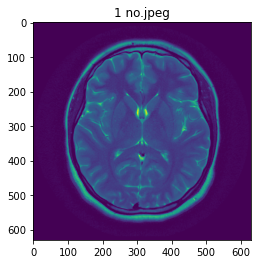

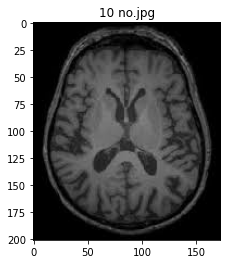

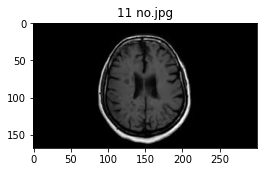

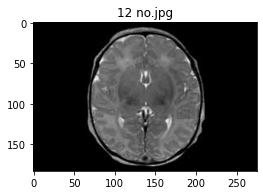

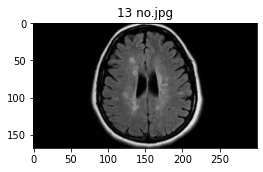

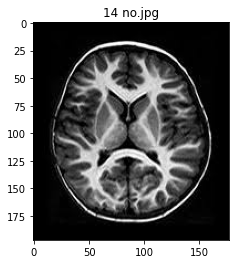

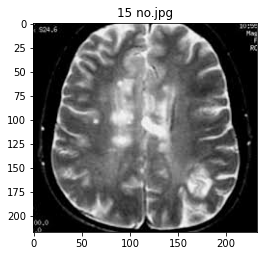

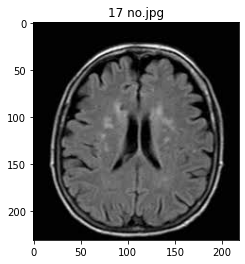

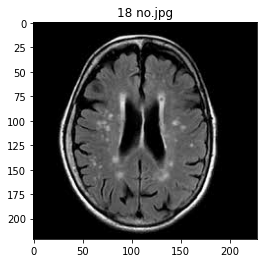

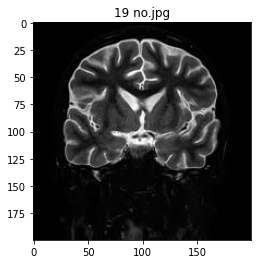

In [10]:
plt.figure(figsize=(4,4))
# View first 10 images
for i in range(0,10):
    fig, ax = plt.subplots(figsize=(4,4))
    img = mpimg.imread(df['filepaths'][i])
    img_name = re.sub(r'^\D+','',df['filepaths'][i])
    ax.imshow(img)
    ax.set_title(img_name)

## DENOISING WITH GAUSSIAN FILTER

In [11]:
# CREATE THE CONVOLUTION FUNCTION.
def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))
 
    print("Kernel Shape : {}".format(kernel.shape))
 
    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()
 
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    output = np.zeros(image.shape)
 
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()
 
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]
 
    print("Output Image size : {}".format(output.shape))
 
    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))

In [12]:
# CREATE A FUNCTION FOR THE GAUSSIAN BLUR FORMULA
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)
 
# DEFINE THE GAUSSIAN KERNEL 
def gaussian_kernel(size, sigma=1, verbose=False):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Kernel ( {}X{} )".format(size, size))
        plt.show()
 
    return kernel_2D
 
# CREATE THE GAUSSIAN FILTER 
def gaussian_blur(image, kernel_size, verbose=False):
    kernel = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size), verbose=verbose)
    return convolution(image, kernel, average=True, verbose=verbose)

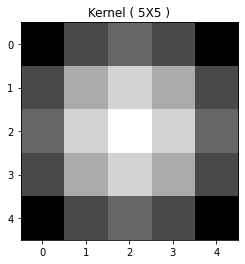

Found 3 Channels : (218, 180, 3)
Converted to Gray Channel. Size : (218, 180)
Kernel Shape : (5, 5)


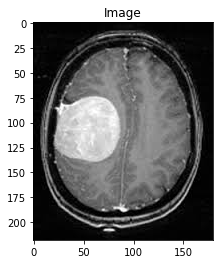

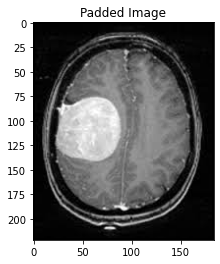

Output Image size : (218, 180)


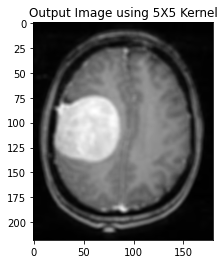

In [13]:
# TESTING THE FILTER ON A GIVEN IMAGE.
image1 = load_img(df['filepaths'][98],(300,300))
image_array1 = img_to_array(image1)
blurred_image = gaussian_blur(image_array1, 5, verbose=True)

## FIND THE AVERAGE WIDTH AND HEIGHT OF EACH IMAGE - FOR RESIZING PURPOSE

In [14]:
# FIRST CREATE A FUNCTION TO DETERMINE THE AVERAGE WIDTH AND HEIGHT OF ALL THE IMAGES IN THE DATASET
def average_width_and_height(dataframe):
    # Using the Pillow library to handle the task
    from PIL import Image
    # Empty list to take the widths of all the images in the dataframe
    widths = []
    # Empty list to take the heights of all the images in the dataframe
    heights = []

    # Looping over all the images in the dataframe and appending their widths and heights to the empty lists
    for idx, row in dataframe.iterrows():
        path = row['filepaths']
        # print(path)
        im = Image.open(path)
        # print(im.size)
        width, height = im.size
        widths.append(width)
        heights.append(height)
    # Calculate the average width and height of the images
    avg_width = int(sum(widths) / len(widths))
    avg_height = int(sum(heights) / len(heights))
    print('Average width is: ',avg_width,' and Average Height is: ', avg_height)

In [15]:
average_width_and_height(df)

Average width is:  354  and Average Height is:  386


The average width is 354 and the average height is 386. Making the width and height equal makes it simpler to do transformations later. So we’ll resize images to 300x300.

In [16]:
# A FUNCTION TO RESIZE A SINGLE IMAGE
from tensorflow.keras.preprocessing.image import load_img

# Image Resize Function
def load_resize_color_image(path, size):
    # load image and resize to 300x300
    image = load_img(path,target_size=size)
    return image

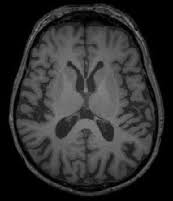

In [17]:
# LOADING THE IMAGE ORDINARILY
load_img('./data/brain_mri_dataset/no/10 no.jpg')

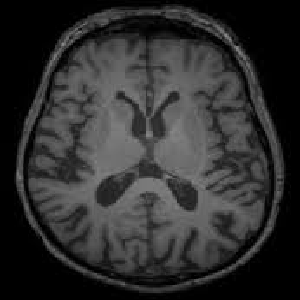

In [18]:
# AFTER APPLYIMG THE RESIZE FUNCTION TO THE SAME IMAGE
load_resize_color_image('./data/brain_mri_dataset/no/10 no.jpg', (300,300))

### Resize all images and apply Gaussian Filter

In [35]:
# CREATE A FUNCTION TO UNDERTAKE THIS TASK
def resize_and_filter(dataframe):
    # Empty list to hold the array of each image corresponding to a file path
    image_list = []
    # Empty list to hold the labels of each image item.
    cancer_list = []
    # Empty list to hold new images.
    new_image_list = []
    for idx, row in dataframe.iterrows():
        path = row['filepaths']
        cancer = row['labels']
        # print(path)
        # print(cancer)
        image = load_resize_color_image(path, (300, 300))
        # turn image to array
        image_array = img_to_array(image)
        # Applying the filter function to an image with a kernel size of 5.
        #filtered_image = gaussian_blur(image_array, 5)
        #new_image = img_to_array(load_resize_color_image(filtered_image, (300, 300)))
        image_list.append(image_array)
        cancer_list.append(cancer)
    return image_list, cancer_list

In [36]:
# APPLY THE FUNCTION TO THE DATAFRAME OF IMAGE PATHS AND RETRIEVE THE LIST OF IMAGE ARRAYS AND THEIR CORRESPONDING LABELS
image_list, cancer_list = resize_and_filter(df)

In [37]:
print(image_list[0:5])

[array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32), array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [

In [38]:
print(new_image_list[0:5])

NameError: name 'new_image_list' is not defined

In [39]:
print(cancer_list[0:5])

[1, 1, 1, 1, 1]


## Shuffle the image and label

In [40]:
from sklearn.utils import shuffle
image_list, cancer_list = shuffle(image_list, cancer_list)

## Define our X, y for train-test-split

In [41]:
X_data = np.array(image_list)
y_data = np.array(cancer_list)

In [42]:
print(X_data.shape)
print(y_data.shape)

(253, 300, 300, 3)
(253,)


## Split into training set and testing set

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=0)

In [44]:
print(X_train.shape)
print(y_train.shape)

(202, 300, 300, 3)
(202,)


In [45]:
print(X_test.shape)
print(y_test.shape)

(51, 300, 300, 3)
(51,)


In [46]:
X_train = X_train/255
X_test = X_test/255

In [47]:
X_train

array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        ...,

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]

## Building CNN Model Architecture

In [48]:
epochs = 10
batch_size = 10
input_shape = (300,300,3)

In [49]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# ANN structure
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [51]:
#   define compile to minimize categorical loss, use ada delta optimized, and optimize to maximizing accuracy
model.compile(loss="binary_crossentropy",
              optimizer='Adam',
              metrics=['accuracy'])

#   Train the model and test/validate the model with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.1)

Epoch 1/10
19/19 [==============================] - 20s 1s/step - loss: 0.6301 - accuracy: 0.6906 - val_loss: 0.6305 - val_accuracy: 0.6667
Epoch 2/10
19/19 [==============================] - 20s 1s/step - loss: 0.5506 - accuracy: 0.7735 - val_loss: 0.6012 - val_accuracy: 0.6667
Epoch 3/10
19/19 [==============================] - 19s 1s/step - loss: 0.4120 - accuracy: 0.8287 - val_loss: 1.4343 - val_accuracy: 0.6667
Epoch 4/10
19/19 [==============================] - 20s 1s/step - loss: 0.4359 - accuracy: 0.8287 - val_loss: 0.6321 - val_accuracy: 0.6667
Epoch 5/10
19/19 [==============================] - 20s 1s/step - loss: 0.3162 - accuracy: 0.8785 - val_loss: 0.6688 - val_accuracy: 0.6667
Epoch 6/10
19/19 [==============================] - 20s 1s/step - loss: 0.1696 - accuracy: 0.9282 - val_loss: 1.8045 - val_accuracy: 0.6667
Epoch 7/10
19/19 [==============================] - 20s 1s/step - loss: 0.2063 - accuracy: 0.9392 - val_loss: 1.1025 - val_accuracy: 0.7143
Epoch 8/10
19/19 [==

Test loss: 1.1140060424804688
Test accuracy: 0.8627451062202454


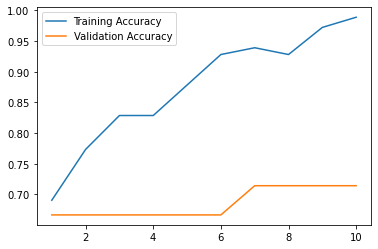

In [52]:
# PLOTTING DATA TO SHOW THE RELATIONSHIPS IN TRAINING AND VALIDATION DATA
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

### Running Predictions on the test data

In [53]:
# Making a prediction on the test set
predictions = model.predict(x=X_test, verbose=0)

In [54]:
# Rounding the probabilities to zero and one
np.round(predictions)

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

## Visualizing The Performance of the Model

In [55]:
# Creating a confusion matrix to view the performance of the model on the test set
cm = confusion_matrix(y_true=y_test, y_pred=np.argmax(predictions, axis=1))

In [56]:
# Function to plot a confusion Matrix
# Directly copied from the Scikit Learn website
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[29  0]
 [22  0]]


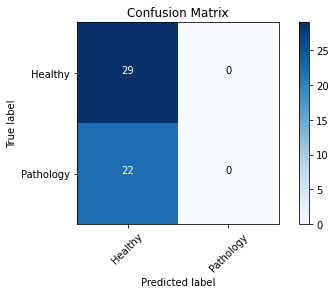

In [57]:
# Defining the labels of the confusion Matrix and plotting it
cm_plot_labels = ['Healthy', 'Pathology']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Run a Prediction on New Image

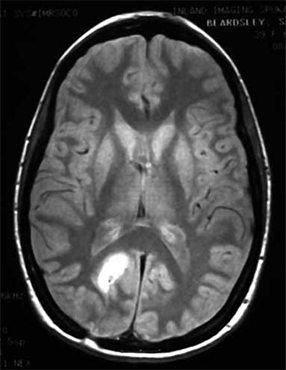

In [58]:
# THIS IS A RANDOM IMAGE FROM THE INTERNET OF A PATHOLOGIC MRI SCAN (BRAIN TUMOR)
load_img('test_image_yes.png')

In [59]:
# A function to take new image, preprocess the image and run a prediction on the image. 
# The function returns the result of the prediction
def new_prediction(image, size):
    # Load and resize image file
    image = load_resize_color_image(image, size)
    # turn image to array
    image_array = img_to_array(image)
    # Normalize each image pixel to a standard range within 0 and 255
    new_image_array = image_array / 255
    # Create a batch of one image
    new_img_array_batch = np.expand_dims(new_image_array, axis=0)
    # Run the prediction
    pred = model.predict(new_img_array_batch)
    return pred

In [60]:
# APPLY THE PREDICTION FUNCTION ON THE NEW IMAGE
new_pred = new_prediction('test2_yes.png', (300, 300))

In [61]:
# ROUND THE PREDICTION TO ASCERTAIN THE LABEL OF THE IMAGE
np.round(new_pred)

array([[0.]], dtype=float32)

In [62]:
# APPLY THE PREDICTION FUNCTION ON THE NEW IMAGE
new_pred = new_prediction('test 3 no.jpg', (300, 300))

# ROUND THE PREDICTION TO ASCERTAIN THE LABEL OF THE IMAGE
np.round(new_pred)

array([[1.]], dtype=float32)

In [63]:
# APPLY THE PREDICTION FUNCTION ON THE NEW IMAGE
new_pred = new_prediction('test2_yes.png', (300, 300))

# ROUND THE PREDICTION TO ASCERTAIN THE LABEL OF THE IMAGE
np.round(new_pred)

array([[0.]], dtype=float32)

The model predicted the correct outcomes of the given images.

In [ ]:
*447*661#
CA26